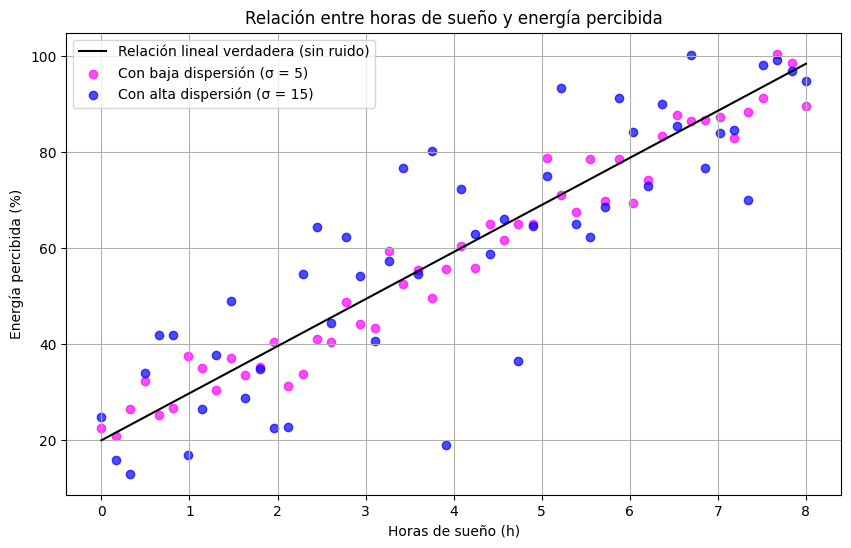

    Horas_de_sueño  Energía_baja_dispersión  Energía_alta_dispersión
0         0.000000                22.483571                24.861260
1         0.163265                20.908678                15.823766
2         0.326531                26.438443                13.046170
3         0.489796                32.415149                33.975144
4         0.653061                25.229233                41.864993
5         0.816327                26.829315                41.969202
6         0.979592                37.496064                17.011737
7         1.142857                35.037174                26.561814
8         1.306122                30.452628                37.768951
9         1.469388                37.112800                49.033177
10        1.632653                33.682912                28.812386
11        1.795918                35.271351                34.815115
12        1.959184                40.409811                22.604975
13        2.122449                

In [13]:
# Equipo Alpha Juan, Pablo, Álvaro
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# generasmo valores de horas de sueño de 0 a 8
horas_sueño = np.linspace(0, 8, 50)

# definimos la relación lineal
pendiente = 9.8
intercepto = 20
y = pendiente * horas_sueño + intercepto

# Añadir ruido con diferentes niveles de dispersión
np.random.seed(42)
desviacion_baja = 5    # Baja dispersión
desviacion_alta = 15   # Alta dispersión

energia_baja_ruido = y + np.random.normal(0, desviacion_baja, size=horas_sueño.shape)
energia_alta_ruido = y + np.random.normal(0, desviacion_alta, size=horas_sueño.shape)

# Creamos un DataFrame para almacenar los datos
# a energía sigue la tendencia lineal 𝑦=12𝑥+20
datos = pd.DataFrame({
    "Horas_de_sueño": horas_sueño,
    "Energía_baja_dispersión": energia_baja_ruido,
    "Energía_alta_dispersión": energia_alta_ruido
})

"""
Primera fila (0 horas de sueño):

Horas_de_sueño: 0 horas.
Energía_baja_dispersión: 22.48, lo que significa que con 0 horas de sueño, la persona percibe un 22.48% de energía debido al ruido de baja dispersión.
Energía_alta_dispersión: 24.86, lo que refleja el mismo caso pero con mayor variabilidad en la energía percibida.

Segunda fila (0.163 horas de sueño, aprox. 10 minutos):
Horas_de_sueño: Aproximadamente 0.16 horas.
Energía_baja_dispersión: 21.27, que refleja la energía percibida después de aproximadamente 10 minutos de sueño, con baja dispersión.
Energía_alta_dispersión: 16.18, con más variabilidad en el valor de la energía debido al ruido alto.
"""

# vemos los datos generados
plt.figure(figsize=(10, 6))
plt.plot(horas_sueño, y, label="Relación lineal verdadera (sin ruido)", color="black", linestyle="-")
plt.scatter(horas_sueño, energia_baja_ruido, label="Con baja dispersión (σ = 5)", color="magenta", alpha=0.7)
plt.scatter(horas_sueño, energia_alta_ruido, label="Con alta dispersión (σ = 15)", color="blue", alpha=0.7)
plt.xlabel("Horas de sueño (h)")
plt.ylabel("Energía percibida (%)")
plt.title("Relación entre horas de sueño y energía percibida")
plt.legend()
plt.grid()
plt.show()

# Mostrar una muestra de los datos generados
print(datos.head(50))


50


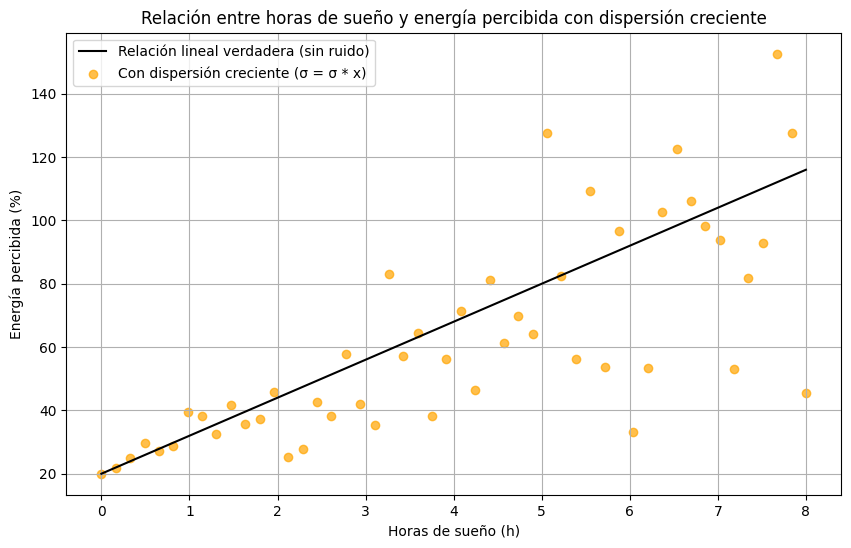

    Horas_de_sueño  Energía_con_ruido
0         0.000000          20.000000
1         0.163265          21.846315
2         0.326531          24.975818
3         0.489796          29.607420
4         0.653061          27.072152
5         0.816327          28.840257
6         0.979592          39.490022
7         1.142857          38.099627
8         1.306122          32.607514
9         1.469388          41.618808
10        1.632653          35.808835
11        1.795918          37.368957
12        1.959184          45.880447
13        2.122449          25.165189
14        2.285714          27.715225
15        2.448980          42.502602
16        2.612245          38.118124
17        2.775510          57.667106
18        2.938776          41.922912
19        3.102041          35.319371
20        3.265306          83.112633
21        3.428571          57.272406
22        3.591837          64.314792
23        3.755102          38.310850
24        3.918367          56.354951
25        4.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

horas_sueño = np.linspace(0, 8, 50)

pendiente = 12
intercepto = 20
y = pendiente * horas_sueño + intercepto





# Definir la desviación estándar del ruido que aumenta con x
# A medida que x crece, la desviación estándar del ruido también lo hace
np.random.seed(42)
desviacion_base = 5
desviacion_ruido = desviacion_base * horas_sueño

# Añadir ruido con la desviación estándar dependiente de x

err = np.random.normal(0, desviacion_ruido)

energia_con_ruido = y + err

# Crear un DataFrame para almacenar los datos
datos = pd.DataFrame({
    "Horas_de_sueño": horas_sueño,
    "Energía_con_ruido": energia_con_ruido
})

# Visualizar los datos generados
plt.figure(figsize=(10, 6))
plt.plot(horas_sueño, y, label="Relación lineal verdadera (sin ruido)", color="black", linestyle="-")
plt.scatter(horas_sueño, energia_con_ruido, label="Con dispersión creciente (σ = σ * x)", color="orange", alpha=0.7)
plt.xlabel("Horas de sueño (h)")
plt.ylabel("Energía percibida (%)")
plt.title("Relación entre horas de sueño y energía percibida con dispersión creciente")
plt.legend()
plt.grid()
plt.show()

# Mostrar una muestra de los primeros 10 datos generados
print(datos.head(50))


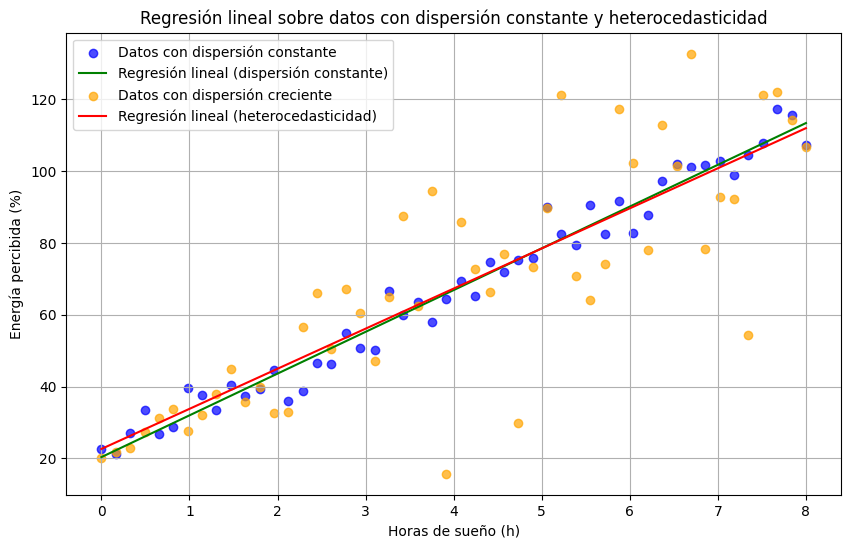

Regresión sobre dispersión constante (homocedasticidad):
Pendiente: 11.64
Intercepto: 20.32
Error cuadrático medio (MSE): 20.63

Regresión sobre dispersión creciente (heterocedasticidad):
Pendiente: 11.18
Intercepto: 22.60
Error cuadrático medio (MSE): 333.73


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

horas_sueño = np.linspace(0, 8, 50)

pendiente = 12
intercepto = 20
y = pendiente * horas_sueño + intercepto




# (homocedasticidad)
np.random.seed(42)
desviacion_constante = 5  # Ruido constante
energia_con_ruido_constante = y + np.random.normal(0, desviacion_constante, size=horas_sueño.shape)

# (heterocedasticidad)
desviacion_ruido = desviacion_constante * horas_sueño  # Aumento del ruido con x
energia_con_ruido_heterocedasticidad = y + np.random.normal(0, desviacion_ruido)

# Realizar la regresión lineal sobre los datos con dispersión constante (homocedasticidad)
regresion_constante = LinearRegression()
X = horas_sueño.reshape(-1, 1)
regresion_constante.fit(X, energia_con_ruido_constante)

# Realizar la regresión lineal sobre los datos con dispersión creciente (heterocedasticidad)
regresion_heterocedastica = LinearRegression()
regresion_heterocedastica.fit(X, energia_con_ruido_heterocedasticidad)

# Visualizar los resultados
plt.figure(figsize=(10, 6))

# Datos con dispersión constante (homocedasticidad)
plt.scatter(horas_sueño, energia_con_ruido_constante, label="Datos con dispersión constante", color="blue", alpha=0.7)
plt.plot(horas_sueño, regresion_constante.predict(X), label="Regresión lineal (dispersión constante)", color="green", linestyle="-")

# Datos con dispersión creciente (heterocedasticidad)
plt.scatter(horas_sueño, energia_con_ruido_heterocedasticidad, label="Datos con dispersión creciente", color="orange", alpha=0.7)
plt.plot(horas_sueño, regresion_heterocedastica.predict(X), label="Regresión lineal (heterocedasticidad)", color="red", linestyle="-")

plt.xlabel("Horas de sueño (h)")
plt.ylabel("Energía percibida (%)")
plt.title("Regresión lineal sobre datos con dispersión constante y heterocedasticidad")
plt.legend()
plt.grid()
plt.show()

# Mostrar los coeficientes de las regresiones
print("Regresión sobre dispersión constante (homocedasticidad):")
print(f"Pendiente: {regresion_constante.coef_[0]:.2f}")
print(f"Intercepto: {regresion_constante.intercept_:.2f}")
print(f"Error cuadrático medio (MSE): {mean_squared_error(energia_con_ruido_constante, regresion_constante.predict(X)):.2f}\n")

print("Regresión sobre dispersión creciente (heterocedasticidad):")
print(f"Pendiente: {regresion_heterocedastica.coef_[0]:.2f}")
print(f"Intercepto: {regresion_heterocedastica.intercept_:.2f}")
print(f"Error cuadrático medio (MSE): {mean_squared_error(energia_con_ruido_heterocedasticidad, regresion_heterocedastica.predict(X)):.2f}")


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

horas_sueño = np.linspace(0, 8, 50)

pendiente = 12
intercepto = 20
y = pendiente * horas_sueño + intercepto

# (homocedasticidad)
np.random.seed(42)
desviacion_constante = 5
energia_con_ruido_constante = y + np.random.normal(0, desviacion_constante, size=horas_sueño.shape)

# (heterocedasticidad)
desviacion_ruido = desviacion_constante * horas_sueño
energia_con_ruido_heterocedasticidad = y + np.random.normal(0, desviacion_ruido)



# Calcular el coeficiente de Pearson para los datos con dispersión constante
correlacion_constante = np.corrcoef(horas_sueño, energia_con_ruido_constante)[0, 1]

# Calcular el coeficiente de Pearson para los datos con dispersión creciente
correlacion_heterocedastica = np.corrcoef(horas_sueño, energia_con_ruido_heterocedasticidad)[0, 1]

# Mostrar los coeficientes de correlación
print(f"Coeficiente de correlación de Pearson (dispersión constante): {correlacion_constante:.3f}")
print(f"Coeficiente de correlación de Pearson (heterocedasticidad): {correlacion_heterocedastica:.3f}")
# tiene q estar por encima o por debajo de 0, si es 0 es una mrd

Coeficiente de correlación de Pearson (dispersión constante): 0.987
Coeficiente de correlación de Pearson (heterocedasticidad): 0.822


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


horas_sueño = np.linspace(0, 8, 50)

pendiente = 12
intercepto = 20
y = pendiente * horas_sueño + intercepto

# (homocedasticidad)
np.random.seed(42)
desviacion_constante = 5  # Ruido constante
energia_con_ruido_constante = y + np.random.normal(0, desviacion_constante, size=horas_sueño.shape)

# (heterocedasticidad)
desviacion_ruido = desviacion_constante * horas_sueño  # Aumento del ruido con x
energia_con_ruido_heterocedasticidad = y + np.random.normal(0, desviacion_ruido)






# regresión lineal sobre los datos con dispersión constante (homocedasticidad)
regresion_constante = LinearRegression()
X = horas_sueño.reshape(-1, 1)  # Convertir a formato 2D para sklearn
regresion_constante.fit(X, energia_con_ruido_constante)

# regresión lineal sobre los datos con dispersión creciente (heterocedasticidad)
regresion_heterocedastica = LinearRegression()
regresion_heterocedastica.fit(X, energia_con_ruido_heterocedasticidad)

# Calcular el coeficiente de determinación (R^2) para ambos casos
r2_constante = regresion_constante.score(X, energia_con_ruido_constante)
r2_heterocedastica = regresion_heterocedastica.score(X, energia_con_ruido_heterocedasticidad)

print(f"Coeficiente de determinación R^2 (dispersión constante): {r2_constante:.3f}")
print(f"Coeficiente de determinación R^2 (heterocedasticidad): {r2_heterocedastica:.3f}")


Coeficiente de determinación R^2 (dispersión constante): 0.973
Coeficiente de determinación R^2 (heterocedasticidad): 0.675


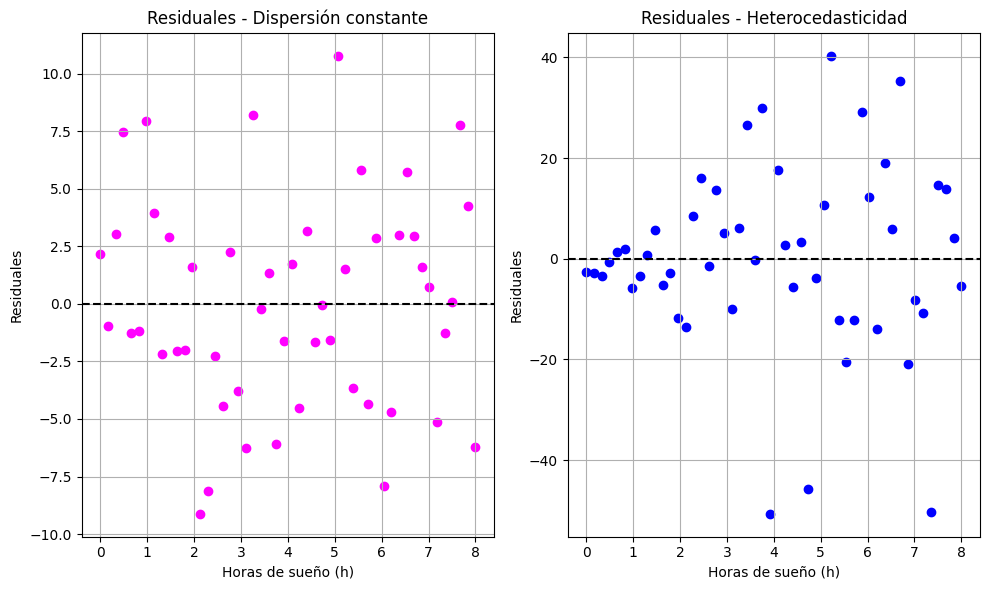

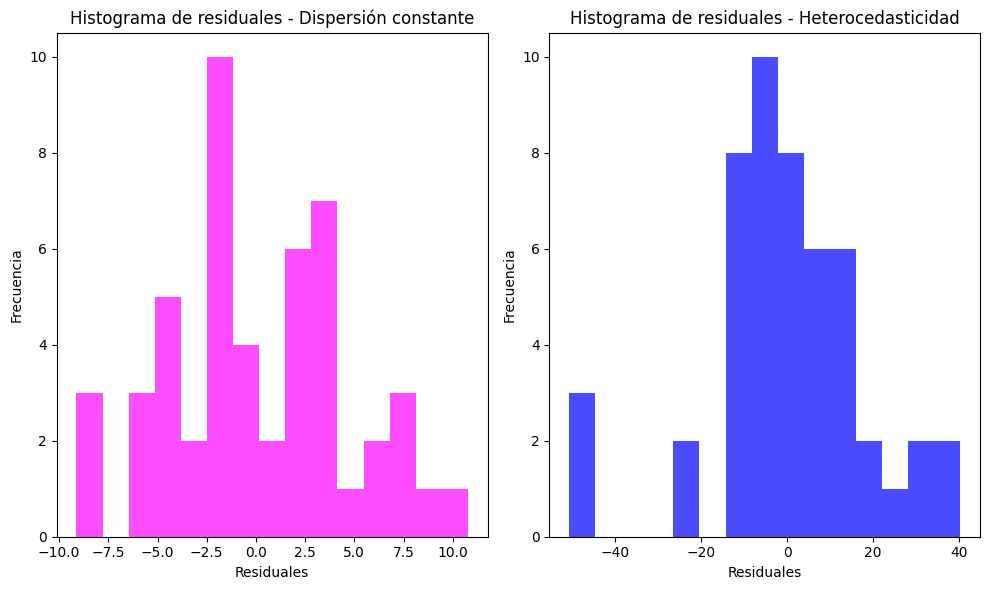

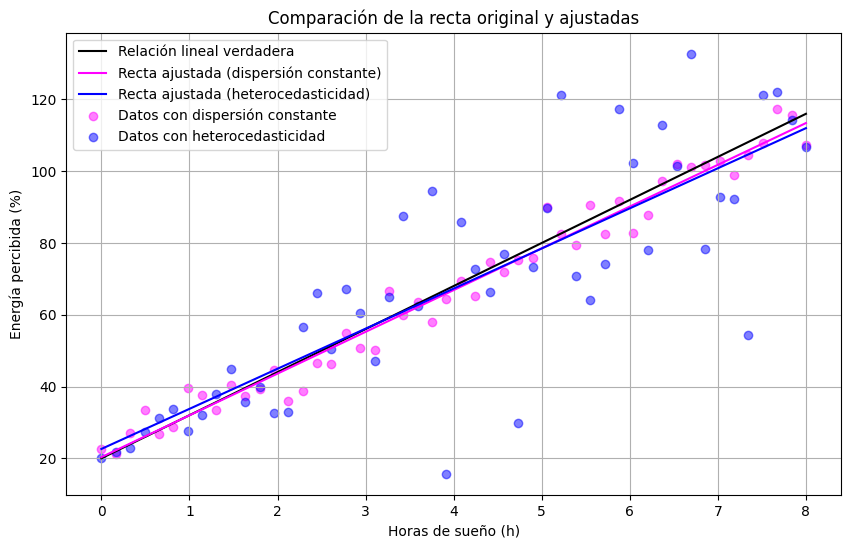

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

horas_sueño = np.linspace(0, 8, 50)

pendiente = 12
intercepto = 20
c = 5
y = pendiente * horas_sueño + intercepto     # normal
# y = pendiente * horas_sueño + intercepto + c * horas_sueño * horas_sueño    # para que se cree una parabola

# (homocedasticidad)
np.random.seed(42)
desviacion_constante = 5  # Ruido constante
energia_con_ruido_constante = y + np.random.normal(0, desviacion_constante, size=horas_sueño.shape)

# (heterocedasticidad)
desviacion_ruido = desviacion_constante * horas_sueño  # Aumento del ruido con x
energia_con_ruido_heterocedasticidad = y + np.random.normal(0, desviacion_ruido)

# regresión lineal sobre los datos con dispersión constante (homocedasticidad)
regresion_constante = LinearRegression()
X = horas_sueño.reshape(-1, 1)  # Convertir a formato 2D para sklearn
regresion_constante.fit(X, energia_con_ruido_constante)

# regresión lineal sobre los datos con dispersión creciente (heterocedasticidad)
regresion_heterocedastica = LinearRegression()
regresion_heterocedastica.fit(X, energia_con_ruido_heterocedasticidad)





# Calcular los valores predichos para ambos casos
predicciones_constante = regresion_constante.predict(X)
predicciones_heterocedastica = regresion_heterocedastica.predict(X)

#Calcular los residuales para ambos casos
residuales_constante = energia_con_ruido_constante - predicciones_constante
residuales_heterocedastica = energia_con_ruido_heterocedasticidad - predicciones_heterocedastica

# Graficar los residuales de ambos modelos
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(horas_sueño, residuales_constante, color="magenta", label="Residuales (dispersión constante)")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Horas de sueño (h)")
plt.ylabel("Residuales")
plt.title("Residuales - Dispersión constante")
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(horas_sueño, residuales_heterocedastica, color="blue", label="Residuales (heterocedasticidad)")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Horas de sueño (h)")
plt.ylabel("Residuales")
plt.title("Residuales - Heterocedasticidad")
plt.grid()

plt.tight_layout()
plt.show()

# Crear histogramas de los residuales
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(residuales_constante, bins=15, color="magenta", alpha=0.7)
plt.title("Histograma de residuales - Dispersión constante")
plt.xlabel("Residuales")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(residuales_heterocedastica, bins=15, color="blue", alpha=0.7)
plt.title("Histograma de residuales - Heterocedasticidad")
plt.xlabel("Residuales")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()



# Graficar la recta original y las rectas ajustadas
plt.figure(figsize=(10, 6))

# Graficar la relación lineal original
plt.plot(horas_sueño, y, label="Relación lineal verdadera", color="black", linestyle="-")

# Graficar la recta ajustada con dispersión constante
plt.plot(horas_sueño, predicciones_constante, label="Recta ajustada (dispersión constante)", color="magenta", linestyle="-")

# Graficar la recta ajustada con heterocedasticidad
plt.plot(horas_sueño, predicciones_heterocedastica, label="Recta ajustada (heterocedasticidad)", color="blue", linestyle="-")

plt.scatter(horas_sueño, energia_con_ruido_constante, color="magenta", alpha=0.5, label="Datos con dispersión constante")
plt.scatter(horas_sueño, energia_con_ruido_heterocedasticidad, color="blue", alpha=0.5, label="Datos con heterocedasticidad")

plt.xlabel("Horas de sueño (h)")
plt.ylabel("Energía percibida (%)")
plt.title("Comparación de la recta original y ajustadas")
plt.legend()
plt.grid()
plt.show()
